<a href="https://colab.research.google.com/github/giuliaries/MachineLearning/blob/main/Delta_Rule_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Giulia Santoiemma](mailto:giulia.santoiemma@studenti.unipd.it) 2004775<br/>
Machine Learning<br/> 
Master Degree in Computer Science<br/>
29 October 2021

In [136]:
# Import libraries
from sklearn.datasets import make_classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Global variables
eta = 0.01 # learning rate
epochs = 1000 # number of iteration done by the algorithm
points_number = 100

In [137]:
# Delta Rule Implementation
# x: m*n matrix containing m n-dimension example, one in each row
# y: vector of the target values
# sigmoid: if True, compute the gradient with the sigmoid activation, otherwise with linear activation
def gradient_descent(x, y, sigmoid = True):
  e, mse = 0, 0
  rows, cols = x.shape
    
  # Initialize the value of the weights w randomly
  w = np.random.rand(cols, 1)
    
  while  e < epochs and mse < float('+inf'):
    delta_w = np.zeros((cols, 1))
    for i in range(rows):
        x_i = x[i,:].reshape(-1, 1) # i-th rows of the training set
        t = y[i] # current classification
        
        # Learning Step
        o = np.dot(x_i.T, w)
        multiplier = 1 / (1 + np.exp(-o)) if sigmoid else 1
        delta_w += eta / rows * (t - o) * multiplier * x_i

    w += delta_w
    mse = sum(y - np.dot(x, w)) ** 2 # Mean Squared Error
    e += 1

  return w

,ones,x,y,t
0,1.0,-1.338140,-10.628749,-1.0
1,1.0,6.865246,6.291527,1.0
2,1.0,8.036188,-5.187325,1.0
3,1.0,3.347482,0.008075,1.0
4,1.0,10.058482,3.767020,1.0
...,...,...,...,...
95,1.0,0.712101,0.108334,-1.0
96,1.0,-6.002212,6.186433,1.0
97,1.0,8.595249,11.758260,1.0
98,1.0,0.919237,-8.164635,-1.0


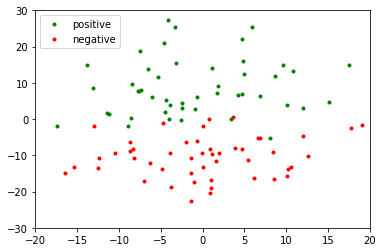

In [143]:
# Generate a linearly dataset by using sklearn.datasets.make_classification
samples = make_classification(n_samples=points_number, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)

# Training Set as pd.DataFrame
ts = pd.DataFrame(columns = ["ones", "x", "y", "t"])
for k, i in enumerate(samples[0]):
  ts = ts.append({
    "ones": 1.0, 
    "x": i[0] * 10,
    "y": i[1] * 10,
    "t": 1 if samples[1][k] == 1 else -1
  }, ignore_index = True)

plt.plot(ts["x"][ts["t"] == 1], ts["y"][ts["t"] == 1], ".g", label = "positive")
plt.plot(ts["x"][ts["t"] == -1], ts["y"][ts["t"] == -1], ".r", label = "negative")
plt.xlim(-20, 20)
plt.ylim(-30, 30)
plt.legend()

ts


Weight vector:
 [[ 0.05142601]
 [-0.00236017]
 [ 0.07128495]]


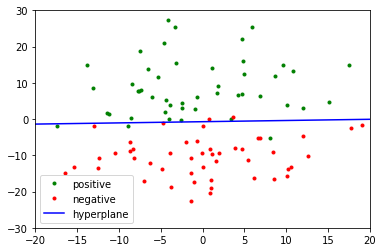

In [144]:
# Linear Activation
wv = gradient_descent(ts.to_numpy()[:, :-1], ts.to_numpy()[:, -1].reshape(-1, 1), False)

plt.plot(ts["x"][ts["t"] == 1], ts["y"][ts["t"] == 1], ".g", label = "positive")
plt.plot(ts["x"][ts["t"] == -1], ts["y"][ts["t"] == -1], ".r", label = "negative")
plt.plot(np.linspace(-20, 20, 100), -(np.linspace(-20, 20, 100) * wv[1, 0] + wv[0, 0]) / wv[2, 0], "-b", label="hyperplane")
plt.xlim(-20, 20)
plt.ylim(-30, 30)
plt.legend()

print("\nWeight vector:\n", wv)


Weight vector:
 [[ 0.07443572]
 [-0.00120109]
 [ 0.06653019]]


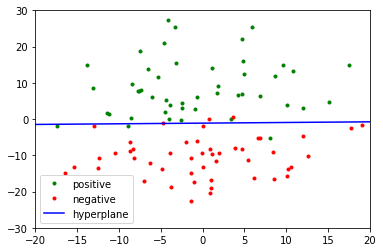

In [145]:
# Sigmoid Activation
wv = gradient_descent(ts.to_numpy()[:, :-1], ts.to_numpy()[:, -1].reshape(-1, 1), True)

plt.plot(ts["x"][ts["t"] == 1], ts["y"][ts["t"] == 1], ".g", label = "positive")
plt.plot(ts["x"][ts["t"] == -1], ts["y"][ts["t"] == -1], ".r", label = "negative")
plt.plot(np.linspace(-20, 20, 100), -(np.linspace(-20, 20, 100) * wv[1, 0] + wv[0, 0]) / wv[2, 0], "-b", label="hyperplane")
plt.xlim(-20, 20)
plt.ylim(-30, 30)
plt.legend()

print("\nWeight vector:\n", wv)

Each time we run the algorithm, it returns one of the possible hyperplanes that classify the example.

The hyperplanes returned is the best-fit solution approximating the target concept: it is capable to separate the data, even if the are not linearly separable, but it does not guarantee that the solution has a null error.<br/><br/>

In this code, we can change the number of the points `points_number` and the learning rate `eta`.

We can see that the smaller the learning rate `eta`, the better the hyperplane approaches the target.